# Classifaction Lab: Predict credit score level

## Introduction:

### Problem Statement
A large global finance bank would like to improve the process of credit risk scoring their customers to eliminate employee biases, human error and standardize the process while improving efficiency. The approach is to build an explainable (white box) machine learning model to replace the current credit scoring system.The output is expected to be explained to a non-technical audience.

# 1. Setup and Data Loading

First, let's import the necessary libraries and load our data sets. We'll work with multiple data sets to illustrate different concepts.

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df_train = pd.read_csv("./train.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_20684\2794806720.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./train.csv")


# Data Explore

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [69]:
df_train.head(5) # not all columns visible

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [70]:
df_train[[ 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries',]]

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
0,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0
1,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0
2,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0
3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0
4,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0
...,...,...,...,...,...,...,...,...
99995,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0
99996,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0
99997,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0
99998,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0


# Data cleaning

In [71]:
df_clean = df_train.copy()

In [72]:
# change datatype to number
df_clean["Annual_Income"] = pd.to_numeric(arg=df_clean["Annual_Income"],errors= "coerce")
df_clean["Num_of_Loan"] = pd.to_numeric(arg=df_clean["Num_of_Loan"],errors= "coerce")
df_clean["Age"] = pd.to_numeric(arg=df_clean["Age"],errors= "coerce")
df_clean["Monthly_Inhand_Salary"] = pd.to_numeric(arg=df_clean["Monthly_Inhand_Salary"],errors= "coerce")
df_clean["Num_Bank_Accounts"] = pd.to_numeric(arg=df_clean["Num_Bank_Accounts"],errors= "coerce")
df_clean["Credit_Utilization_Ratio"] = pd.to_numeric(arg=df_clean["Credit_Utilization_Ratio"],errors= "coerce")
df_clean["Num_Credit_Card"] = pd.to_numeric(arg=df_clean["Num_Credit_Card"],errors= "coerce")
df_clean["Interest_Rate"] = pd.to_numeric(arg=df_clean["Interest_Rate"],errors= "coerce")
df_clean["Num_of_Loan"] = pd.to_numeric(arg=df_clean["Num_of_Loan"],errors= "coerce")
df_clean["Delay_from_due_date"] = pd.to_numeric(arg=df_clean["Delay_from_due_date"],errors= "coerce")
df_clean["Num_of_Delayed_Payment"] = pd.to_numeric(arg=df_clean["Num_of_Delayed_Payment"],errors= "coerce")
df_clean["Changed_Credit_Limit"] = pd.to_numeric(arg=df_clean["Changed_Credit_Limit"],errors= "coerce")
df_clean["Num_Credit_Inquiries"] = pd.to_numeric(arg=df_clean["Num_Credit_Inquiries"],errors= "coerce")
df_clean["Outstanding_Debt"] = pd.to_numeric(arg=df_clean["Outstanding_Debt"],errors= "coerce")
df_clean["Total_EMI_per_month"] = pd.to_numeric(arg=df_clean["Total_EMI_per_month"],errors= "coerce")
df_clean["Amount_invested_monthly"] = pd.to_numeric(arg=df_clean["Amount_invested_monthly"],errors= "coerce")
df_clean["Monthly_Balance"] = pd.to_numeric(arg=df_clean["Monthly_Balance"],errors= "coerce")
# remove NAN
df_clean = df_clean.dropna()

# Exploratory Data Analysis

In [73]:
# extra EDA
df_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,40147.000000,4.014700e+04,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000,40147.000000
mean,109.563081,1.822384e+05,4021.484897,17.284903,23.425686,77.539542,3.158517,21.954144,32.010287,10.718974,27.189429,1507.590173,32.208931,1444.127305,181.545440,382.515763
std,684.746468,1.486651e+06,3093.759249,117.824489,131.684544,484.886233,62.632435,15.222232,230.589089,6.887986,187.766797,1188.317395,5.062240,8396.879981,176.495313,194.877626
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.881250,4.462837,0.000000,0.382558
25%,24.000000,1.884955e+04,1574.365208,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.610000,3.000000,608.160000,28.017538,41.167536,69.391772,265.060064
50%,33.000000,3.599191e+04,2987.101667,6.000000,6.000000,15.000000,3.000000,19.000000,14.000000,9.680000,6.000000,1239.810000,32.240385,78.271158,123.766491,325.458047
75%,42.000000,6.998472e+04,5717.385000,8.000000,7.000000,22.000000,5.000000,29.000000,19.000000,15.440000,9.000000,2128.870000,36.397712,169.481984,223.596171,444.782770
max,8697.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1485.000000,67.000000,4397.000000,36.970000,2594.000000,4998.070000,49.564519,82236.000000,1572.803231,1552.946094


In [74]:
((df_clean["Age" ] > 100) | (df_clean["Age" ] < 1)).sum()

np.int64(1138)

In [75]:
df_clean = df_clean[df_clean["Age"] < 90]
df_clean = df_clean[df_clean["Age"] >  0 ]
df_clean = df_clean[df_clean["Num_Bank_Accounts"] >= 0]
df_clean = df_clean[df_clean["Num_of_Loan"] >= 0]
df_clean = df_clean[df_clean["Num_of_Delayed_Payment"] >= 0]
df_clean = df_clean[df_clean["Num_of_Delayed_Payment"] < 40]



In [76]:
df_clean.select_dtypes("number").corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.007181,0.092558,0.004137,-0.007799,0.004140,0.000026,-0.172296,-0.184908,-0.157861,-0.002915,-0.201319,0.020923,0.003542,0.065304,0.110717
Annual_Income,0.007181,1.000000,0.021291,-0.001957,0.003033,-0.002548,0.001849,-0.009218,0.003231,0.003731,-0.005506,0.005698,0.005977,-0.013094,0.014471,0.011321
Monthly_Inhand_Salary,0.092558,0.021291,1.000000,-0.008188,-0.002741,0.000422,-0.009327,-0.246937,-0.281436,-0.170706,-0.003192,-0.272952,0.157145,0.011420,0.628437,0.684467
Num_Bank_Accounts,0.004137,-0.001957,-0.008188,1.000000,-0.003733,-0.002688,-0.001798,0.014634,0.010882,0.012444,0.003211,0.017395,-0.002564,-0.005568,-0.006830,-0.008797
Num_Credit_Card,-0.007799,0.003033,-0.002741,-0.003733,1.000000,-0.006793,0.010046,0.018932,0.010108,0.000925,-0.002220,0.012675,-0.000778,0.000118,-0.002628,-0.004846
Interest_Rate,0.004140,-0.002548,0.000422,-0.002688,-0.006793,1.000000,-0.004487,0.002500,-0.000695,-0.003985,0.002942,0.002597,-0.001723,0.001288,0.000380,0.002095
Num_of_Loan,0.000026,0.001849,-0.009327,-0.001798,0.010046,-0.004487,1.000000,0.011487,0.020959,0.016904,0.001441,0.024667,-0.003081,-0.002153,-0.009967,-0.014289
Delay_from_due_date,-0.172296,-0.009218,-0.246937,0.014634,0.018932,0.002500,0.011487,1.000000,0.534895,0.272575,0.004132,0.571590,-0.050653,-0.005128,-0.172394,-0.268051
Num_of_Delayed_Payment,-0.184908,0.003231,-0.281436,0.010882,0.010108,-0.000695,0.020959,0.534895,1.000000,0.306687,0.008584,0.508835,-0.061528,-0.003466,-0.192831,-0.292624
Changed_Credit_Limit,-0.157861,0.003731,-0.170706,0.012444,0.000925,-0.003985,0.016904,0.272575,0.306687,1.000000,0.001447,0.454103,-0.035573,-0.000843,-0.118059,-0.192759


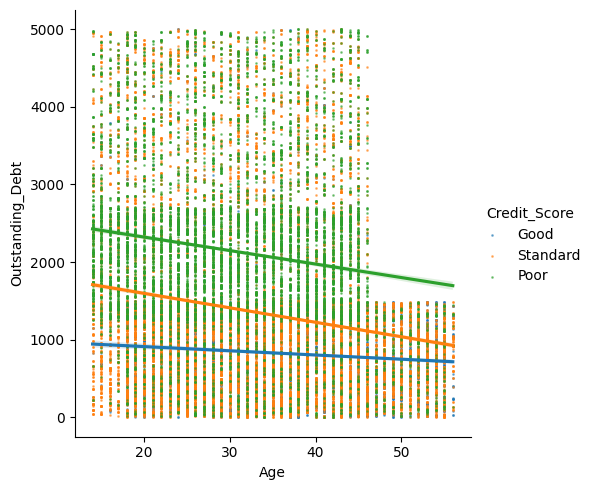

In [77]:
sns.lmplot(data=df_clean, y='Outstanding_Debt',x='Age', hue='Credit_Score',scatter_kws={'alpha':0.5, 's':1})


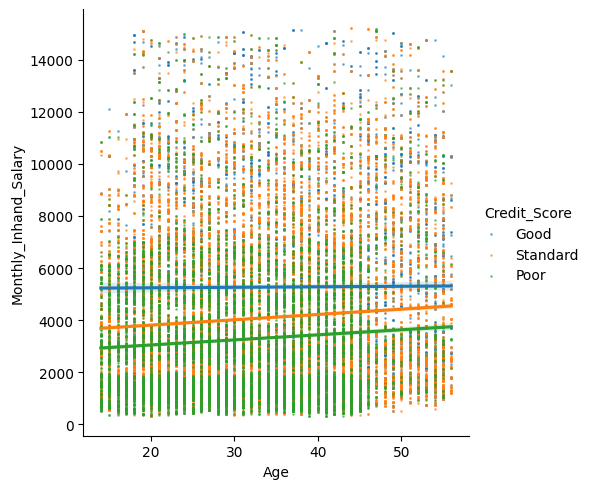

In [78]:
sns.lmplot(data=df_clean, y='Monthly_Inhand_Salary',x='Age', hue='Credit_Score',scatter_kws={'alpha':0.5, 's':1})

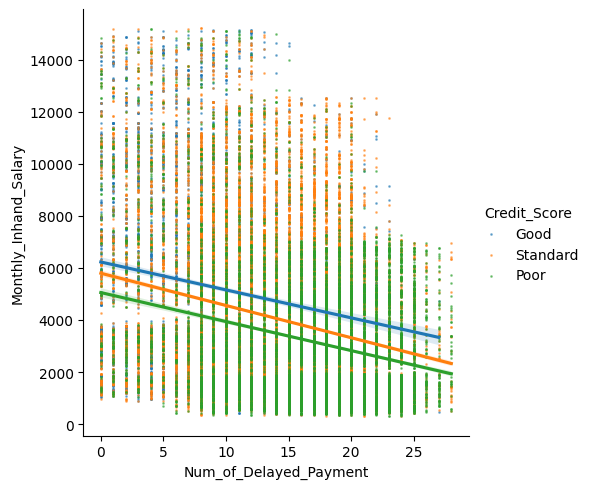

In [79]:
sns.lmplot(data=df_clean, y='Monthly_Inhand_Salary',x='Num_of_Delayed_Payment', hue='Credit_Score',scatter_kws={'alpha':0.5, 's':1})


Observation from charts: \
Green class \
    2- low age and low salary \
    2- low delayed payments\
yellow class\
    2- low delayed paymets and low salary\
     or medium delayed paymets and high salary\
blue class\
    2- high salary\
    2- 


what effect credit score (from internet)
- late payment lower score
- pay on time increase score
- low credit utlization increase score
- longer history (indirectly means Age) increase score

# Pre Processing

In [87]:

# prepare X and y 
X1_columns = ['Annual_Income','Outstanding_Debt','Credit_Utilization_Ratio']
X1 = df_clean[X1_columns]
y1 = df_clean["Credit_Score"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.25, random_state=10, stratify=y1)
sc1 = StandardScaler()
X_train_sc1 = sc1.fit_transform(X_train1)
X_test_sc1 = sc1.transform(X_test1)

# X2 y2
X2_columns = ['Age','Num_of_Delayed_Payment','Credit_Utilization_Ratio',"Outstanding_Debt"]
X2 = df_clean[X2_columns]
y2 = df_clean["Credit_Score"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.25, random_state=20, stratify=y2)
sc2 = StandardScaler()
X_train_sc2 = sc2.fit_transform(X_train2)
X_test_sc2 = sc2.transform(X_test2)


# modeling

In [88]:
#knn model 1
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_sc1,y_train1)

#Logistic model1
lr1 = LogisticRegression()
lr1.fit(X_train_sc1,y_train1)

#knn model 2
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_sc2,y_train2)

#Logistic model2
lr2 = LogisticRegression()
lr2.fit(X_train_sc2,y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Result Evaluation

In [ ]:
# print metrics
def print__class_metrics(y, y_pred, model_name):
    print(f"""== {model_name} ==
    Accuracy = {metrics.accuracy_score(y,y_pred)}
    Recall / Sensitivity / True Positive Rate (TPR): = {metrics.recall_score(y,y_pred,average="weighted")}
    Precision: {metrics.precision_score(y, y_pred,average="weighted")}
    Specificity / True Negative Rate (TNR) = {metrics.recall_score(y, y_pred, pos_label=0,average='weighted')}
          """)
print__class_metrics(y_train1,knn1.predict(X_train_sc1),"train knn1 n_neighbor=3")
print__class_metrics(y_train1,lr1.predict(X_train_sc1),"train logisic 1")
print__class_metrics(y_test1,knn1.predict(X_test_sc1),"test knn1 n_neighbor=3")
print__class_metrics(y_test1,lr1.predict(X_test_sc1),"test logisic 1")

print__class_metrics(y_train2,knn2.predict(X_train_sc2),"train knn2 n_neighbor=3") 
print__class_metrics(y_train2,lr2.predict(X_train_sc2),"train logisic 2")
print__class_metrics(y_test2,knn2.predict(X_test_sc2),"test knn2 n_neighbor=3")  # high training + low test score --> overfitted in KNN
print__class_metrics(y_test2,lr2.predict(X_test_sc2),"test logisic 2")


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


== train knn1 n_neighbor=3 ==
    Accuracy = 0.7397027447293241
    Recall / Sensitivity / True Positive Rate (TPR): = 0.7397027447293241
    Precision: 0.7433972266009073
    Specificity / True Negative Rate (TNR) = 0.7397027447293241
          


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


== train logisic 1 ==
    Accuracy = 0.5237768054099012
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5237768054099012
    Precision: 0.42868887833423625
    Specificity / True Negative Rate (TNR) = 0.5237768054099012
          
== test knn1 n_neighbor=3 ==
    Accuracy = 0.5181167281405945
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5181167281405945
    Precision: 0.5246794392370906
    Specificity / True Negative Rate (TNR) = 0.5181167281405945
          


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


== test logisic 1 ==
    Accuracy = 0.5240833152527663
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5240833152527663
    Precision: 0.42936923993224696
    Specificity / True Negative Rate (TNR) = 0.5240833152527663
          


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


== train knn2 n_neighbor=3 ==
    Accuracy = 0.7605684735833363
    Recall / Sensitivity / True Positive Rate (TPR): = 0.7605684735833363
    Precision: 0.7643628333742857
    Specificity / True Negative Rate (TNR) = 0.7605684735833363
          


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


== train logisic 2 ==
    Accuracy = 0.5391458431273279
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5391458431273279
    Precision: 0.5225709206418553
    Specificity / True Negative Rate (TNR) = 0.5391458431273279
          
== test knn2 n_neighbor=3 ==
    Accuracy = 0.5619440225645477
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5619440225645477
    Precision: 0.5660050495866625
    Specificity / True Negative Rate (TNR) = 0.5619440225645477
          
== test logisic 2 ==
    Accuracy = 0.5352571056628336
    Recall / Sensitivity / True Positive Rate (TPR): = 0.5352571056628336
    Precision: 0.5195070063254682
    Specificity / True Negative Rate (TNR) = 0.5352571056628336
          


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1784: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Testing

In [1]:
# #testing data frame
# df_test = pd.read_csv('test.csv')
# df_test.head()

In [2]:
# df_test_clean = df_test
# # type cast
# df_test_clean["Annual_Income"] = pd.to_numeric(arg=df_test_clean["Annual_Income"],errors= "coerce")
# df_test_clean["Num_of_Loan"] = pd.to_numeric(arg=df_test_clean["Num_of_Loan"],errors= "coerce")
# df_test_clean["Age"] = pd.to_numeric(arg=df_test_clean["Age"],errors= "coerce")
# df_test_clean["Monthly_Inhand_Salary"] = pd.to_numeric(arg=df_test_clean["Monthly_Inhand_Salary"],errors= "coerce")
# df_test_clean["Num_Bank_Accounts"] = pd.to_numeric(arg=df_test_clean["Num_Bank_Accounts"],errors= "coerce")
# df_test_clean["Credit_Utilization_Ratio"] = pd.to_numeric(arg=df_test_clean["Credit_Utilization_Ratio"],errors= "coerce")

# df_test_clean["Num_Credit_Card"] = pd.to_numeric(arg=df_test_clean["Num_Credit_Card"],errors= "coerce")
# df_test_clean["Interest_Rate"] = pd.to_numeric(arg=df_test_clean["Interest_Rate"],errors= "coerce")
# df_test_clean["Num_of_Loan"] = pd.to_numeric(arg=df_test_clean["Num_of_Loan"],errors= "coerce")
# df_test_clean["Delay_from_due_date"] = pd.to_numeric(arg=df_test_clean["Delay_from_due_date"],errors= "coerce")
# df_test_clean["Num_of_Delayed_Payment"] = pd.to_numeric(arg=df_test_clean["Num_of_Delayed_Payment"],errors= "coerce")
# df_test_clean["Changed_Credit_Limit"] = pd.to_numeric(arg=df_test_clean["Changed_Credit_Limit"],errors= "coerce")
# df_test_clean["Num_Credit_Inquiries"] = pd.to_numeric(arg=df_test_clean["Num_Credit_Inquiries"],errors= "coerce")

# df_test_clean["Outstanding_Debt"] = pd.to_numeric(arg=df_test_clean["Outstanding_Debt"],errors= "coerce")
# df_test_clean["Total_EMI_per_month"] = pd.to_numeric(arg=df_test_clean["Total_EMI_per_month"],errors= "coerce")
# df_test_clean["Amount_invested_monthly"] = pd.to_numeric(arg=df_test_clean["Amount_invested_monthly"],errors= "coerce")
# df_test_clean["Monthly_Balance"] = pd.to_numeric(arg=df_test_clean["Monthly_Balance"],errors= "coerce")
# # remove null
# df_test_clean = df_test_clean.dropna()
# # extract X and y
# X_test1 = df_test_clean[X1_columns]
# y_test1 = df_test_clean["Credit_Score"]
# X_test1sc = sc1.transform(X_test1)
# print__class_metrics(y_test1,knn1.predict(X_train_sc1))

In [65]:
# sns.pairplot(df_clean, hue="Credit_Score")
# plt.show()